In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from numpy import random
from shapely.geometry import Point
%matplotlib inline
#Code based on example found on http://mattmurray.net/unlocking-the-power-of-geospatial-data-with-geopandas/

In [52]:
# to import the raw data into pandas
#SARASFOEMS = pd.read_csv('SARA_SF_NO_SFO.csv', header=0)
SFOEMS = pd.read_csv('SFO_EMS_FINAL_120619.csv', header=0)
SFOEMS.head()

,Address,IncidentDate,IncidentDay,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,ResponseTm,...,EMSPersonnel,OtherUnits,OtherPersonnel,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,Lat,Long
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,3:05:56 AM,1/1/2016,3:12:09 AM,1/1/2016,3:13:08,373,...,0,0,0,Good Intent,"good intent call, other",n none,6.0,South of Market,37.783292,-122.407189
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,8:20:46 AM,1/1/2016,8:24:57 AM,1/1/2016,8:25:17,251,...,0,0,0,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,37.789435,-122.406959
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,4:43:25 AM,1/1/2016,4:48:45 AM,1/1/2016,5:10:07,320,...,0,0,0,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,37.781635,-122.415111
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,5:55:50 PM,1/1/2016,6:03:16 PM,1/1/2016,18:05:59,446,...,0,0,0,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,37.784043,-122.403715
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,5:35:47 AM,1/1/2016,5:41:10 AM,1/1/2016,5:42:21,323,...,0,0,0,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,37.782230,-122.410293


In [53]:
#To add row 'geometry' from 'Lat' and 'Long' for use in geopandas
SFOEMS['geometry'] = SFOEMS.apply(lambda row: Point(row['Long'], row['Lat']), axis=1)
SFOEMS.sample(5)

,Address,IncidentDate,IncidentDay,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,ResponseTm,...,OtherUnits,OtherPersonnel,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,Lat,Long,geometry
42815,51 6th Street,5/7/2017,Sunday,5/7/2017,4:10:58 PM,5/7/2017,4:13:40 PM,5/7/2017,16:26:11,162,...,0,0,False Alarm,alarm system sounded due to malfunction,n none,6.0,South of Market,37.781687,-122.409222,POINT (-122.409222 37.781687)
40242,728 Cole Street,4/6/2017,Thursday,4/6/2017,6:16:15 AM,4/6/2017,6:19:19 AM,4/6/2017,6:34:57,184,...,1,2,Good Intent,"smoke scare, odor of smoke",n none,5.0,Haight Ashbury,37.768074,-122.450331,POINT (-122.450331 37.768074)
59931,0 20th Street,11/20/2017,Monday,11/20/2017,7:26:45 PM,11/20/2017,7:29:30 PM,11/20/2017,19:30:09,165,...,0,0,False Alarm,"municipal alarm system, malicious false alarm",n none,9.0,Mission,37.759677,-122.402081,POINT (-122.402081 37.759677)
1430,1762 Chestnut Street,1/16/2016,Saturday,1/16/2016,5:57:34 PM,1/16/2016,6:01:07 PM,1/16/2016,18:09:32,213,...,0,0,False Alarm,"false alarm or false call, other",n none,2.0,Marina,37.801382,-122.432346,POINT (-122.432346 37.801382)
36960,2055 Silver Avenue,2/24/2017,Friday,2/24/2017,3:11:09 PM,2/24/2017,3:15:06 PM,2/24/2017,15:22:28,237,...,0,0,False Alarm,"false alarm or false call, other",n none,10.0,Bayview Hunters Point,37.735888,-122.399876,POINT (-122.399876 37.735888)


In [117]:
#To create new dataframe to only include 'geometry' and select random sample of data from dataset as using all data points makes the map too difficult to read
SFOEMS_sample = SFOEMS[['geometry', 'Zipcode']]
SFOEMS_sample = SFOEMS_sample.sample(n=7500)
SFOEMS_sample.head()

,geometry,Zipcode
8653,POINT (-122.40442 37.729837),94134
12540,POINT (-122.416826 37.763669),94110
44691,POINT (-122.428454 37.77905),94102
29167,POINT (-122.423969 37.79056),94109
54178,POINT (-122.429556 37.776044),94102


In [118]:
#To create a GeoDataFrame from the data
geo_SFO_EMS = geopandas.GeoDataFrame(SFOEMS_sample, geometry='geometry')
geo_SFO_EMS.crs = {'init': 'epsg:4326'}
geo_SFO_EMS.head()

,geometry,Zipcode
8653,POINT (-122.40442 37.72984),94134
12540,POINT (-122.41683 37.76367),94110
44691,POINT (-122.42845 37.77905),94102
29167,POINT (-122.42397 37.79056),94109
54178,POINT (-122.42956 37.77604),94102


In [119]:
#To ensure type is GeoDataFrame
type(geo_SFO_EMS)

geopandas.geodataframe.GeoDataFrame

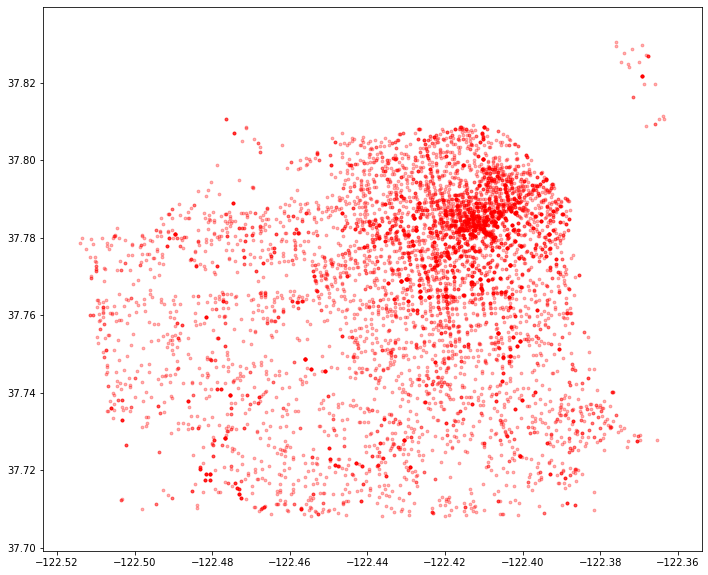

In [120]:
#To generate coordinate data from the GeoDataFrame on a lat/long map
geo_SFO_EMS.plot(figsize=(13,10), marker="o", color="red", markersize=8, alpha=0.3)
plt.show()

In [121]:
sf = geopandas.read_file('sf.geojson')
sf.crs = {'init': 'epsg:4326'}
sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')
sf.sample(5)

,city,zip,dst,longitude,state,latitude,timezone,geometry
30,San Francisco,94116,1,-122.485780,CA,37.743381,-8,POINT (-122.48578 37.74338)
65,San Francisco,94157,1,-122.727802,CA,37.784827,-8,POINT (-122.72780 37.78483)
41,San Francisco,94124,1,-122.393480,CA,37.732797,-8,POINT (-122.39348 37.73280)
19,San Francisco,94121,1,-122.492650,CA,37.778729,-8,POINT (-122.49265 37.77873)
11,San Francisco,94118,1,-122.461580,CA,37.782029,-8,POINT (-122.46158 37.78203)


In [135]:
#sf = geo_SFO_EMS.groupby('Zipcode').count()
#sf_mod2 = pd.DataFrame(sf,columns=['Zipcode'])  # remove unneeded columns
#sf_mod2.reset_index(inplace=True)   # default index, otherwise groupby column becomes index
#sf_mod2.rename(columns={'zip':'Zip Code','Category':'Count'}, inplace=True)
#sf_mod2.sort_values(by='Count', inplace=True, ascending=False)
#print(sf_mod2)

In [136]:
#sf_mod = sf(['Zip Code'], ['Count'])
#sf_mod.head()

In [156]:
#SourceL https://geodata.lib.berkeley.edu/catalog/ark28722-s7888q
#To generate the San Francisco map 
sf = geopandas.read_file('san-francisco.geojson')
sf.crs = {'init': 'epsg:4326'}
#sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name', 'zipcode': 'Zip Code'}).set_geometry('geometry')
sf.sample(5)

,OBJECTID,DISTRICT,COMPANY,geometry
2,3,BAYVIEW,C,"POLYGON ((-122.39342 37.70841, -122.39349 37.7..."
9,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7..."
1,2,SOUTHERN,B,"MULTIPOLYGON (((-122.38822 37.79000, -122.3880..."
6,7,INGLESIDE,H,"POLYGON ((-122.40830 37.70833, -122.41009 37.7..."
7,8,TARAVAL,I,"POLYGON ((-122.45552 37.71099, -122.45560 37.7..."


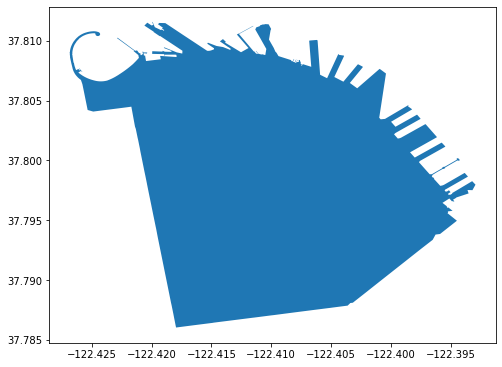

In [157]:
#To test that one neighborhood section of the map works
sf[0:1].plot(figsize=(8,8))
plt.show()

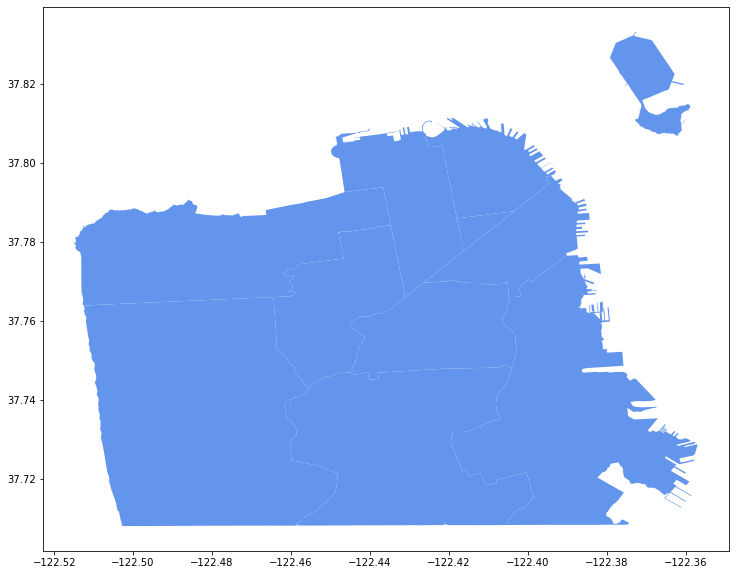

In [158]:
#To generate all neighborhoods of San Francisco and change the color
sf.plot(figsize=(13,10), color='cornflowerblue')
plt.show()

In [144]:
#conda install -c conda-forge folium

In [145]:
#import folium  
#from IPython.display import HTML, display
#LDN_COORDINATES = (37.77, -122.42) 
#myMap = folium.Map(location=LDN_COORDINATES, zoom_start=12)
#myMap._build_map()
#mapWidth, mapHeight = (400,500) # width and height of the displayed iFrame, in pixels
#srcdoc = myMap.HTML.replace('"', '&quot;')
#embed = HTML('<iframe srcdoc="{}" '
             #'style="width: {}px; height: {}px; display:block; width: 50%; margin: 0 auto; '
             #'border: none"></iframe>'.format(srcdoc, width, height))
#embed

In [146]:
#To import Python library folium to help generate map
#import folium

#map_osm=folium.Map(location=[37.77, -122.42], zoom_start=6, tiles='Stamen Terrain')
#folium.Marker([37.77, -122.42]).add_to(map_osm)

#map_osm.save('spst.html')

In [147]:
#sf_map = folium.Map(
       #location=[-122.42, 37.77],
       #zoom_start=12)

In [148]:
#pip install --user descartes

In [149]:
#sf[0:1].plot(figsize=(8,8))
#plt.show()

In [150]:
#conda install descartes

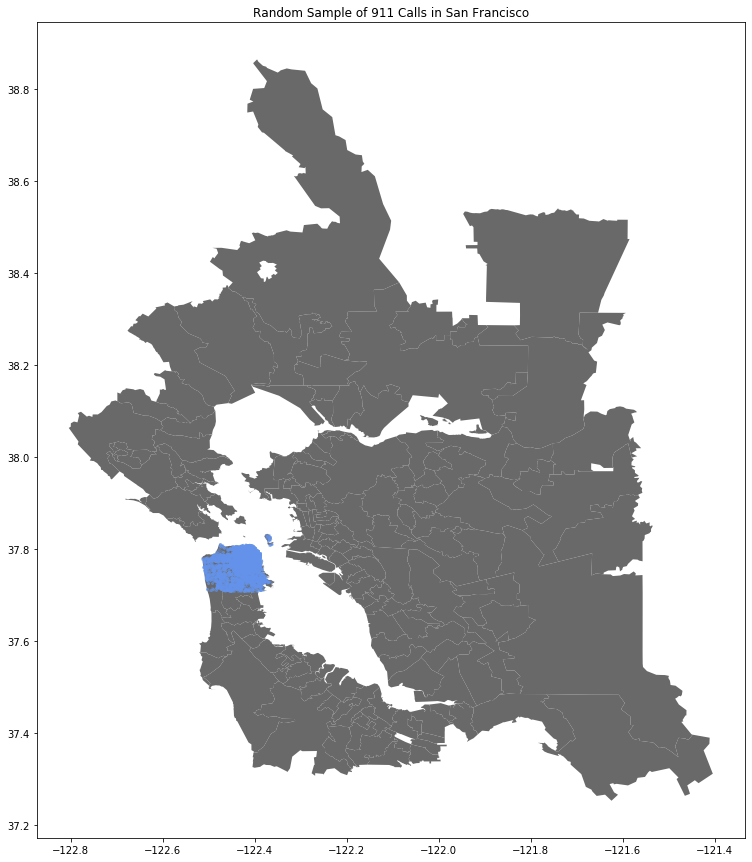

In [151]:
fig, ax = plt.subplots(1, figsize=(15,15))
sf_map = sf.plot(ax=ax, color='dimgrey')
geo_SFO_EMS.plot(ax=sf_map, marker="o", color="cornflowerblue", markersize=4, alpha=0.3)
#geo_SFO_EMS.plot(figsize=(13,10), marker="o", color="red", markersize=8, alpha=0.3)
#geo_SFO_EMS.plot(ax=sf_map, marker='o', color='red', markersize=8, alpha=0.3)
ax.set_title('Random Sample of 911 Calls in San Francisco')
plt.show()